##### Importing the Dataset

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

#convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)

#create the species column

df['Species'] = data.target

#replace this with the actual names

target = np.unique(data.target)

target_names = np.unique(data.target_names)

targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)

The following step will be used to extract our testing and training datasets. The goal is to guarantee that the model is not trained on all of the given data, enabling us to observe how it performs on data that hasn't been seen before. If we use all of the data as training data, we risk overfitting the model, meaning it will perform poorly on unknown data.

##### Extracting Datasets

In [39]:
from sklearn.model_selection import train_test_split
x = df.drop(columns="Species")

y = df["Species"]

feature_names = x.columns

labels = y.unique()

# split the dataset

X_train, test_x, y_train, test_lab = train_test_split(x, y,test_size=0.4, random_state=42)


Now that we have the data in the right format, we will build the decision tree in order to anticipate how the different flowers will be classified. The first step is to import the DecisionTreeClassifier package from the sklearn library. 

##### Importing Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

As part of the next step, we need to apply this to the training data. The classifier is initialized to the clf for this purpose, with max depth = 3 and random state = 42. The max depth argument controls the tree's maximum depth. We use this to ensure that no overfitting is done and that we can simply see how the final result was obtained. The random state parameter assures that the results are repeatable in subsequent investigations. We will now fit the algorithm to the training data.

##### Fitting Algorithm to Training Data

In [41]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We want to be able to understand how the algorithm works, and one of the benefits of employing a decision tree classifier is that the output is simple to comprehend and visualize.

##### Checking the Algorithms

We can do this using the following two ways:

    1. As a tree diagram
    2. As a text-based diagram

Let us now see the detailed implementation of these:

##### 1. Tree diagram

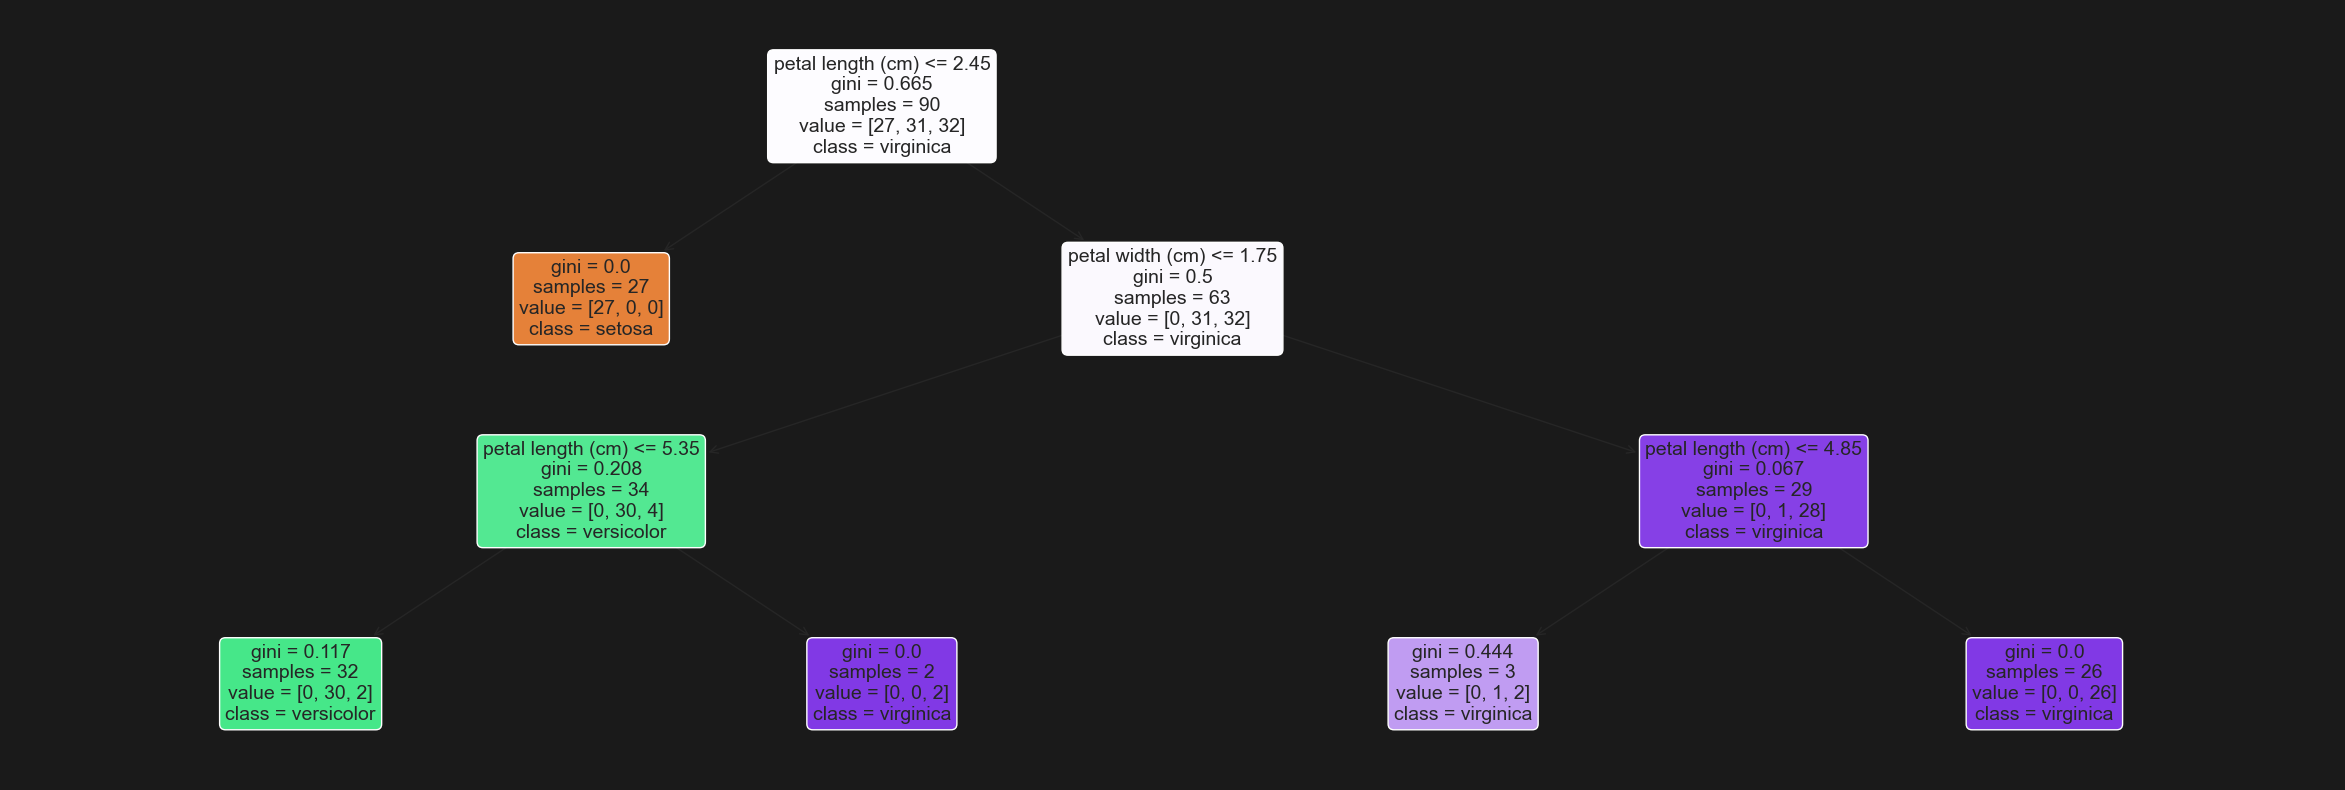

In [42]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)

plt.show()

##### 2. As a Text-Based Diagram

In [43]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names = list(feature_names))

print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



The first division is based on Petal Length, with those measuring less than 2.45 cm classified as Iris-setosa and those measuring more as Iris-virginica. For all those with petal lengths more than 2.45, a further split occurs, followed by two further splits to produce more precise final classifications.

Here, we are not only interested in how well it did on the training data, but we are also interested in how well it works on unknown test data. This implies we will need to utilize it to forecast the class based on the test results, which we will do with the predict() method.

##### Predict Class From Test Values

In [44]:
test_pred_decision_tree = clf.predict(test_x)

We are concerned about false negatives (predicted false but actually true), true positives (predicted true and actually true), false positives (predicted true but not actually true), and true negatives (predicted false and actually false). 

Examining the results in a confusion matrix is one approach to do so. A confusion matrix allows us to see how the predicted and true labels match up by displaying actual values on one axis and anticipated values on the other. This is useful for determining where we might get false negatives or negatives and how well the algorithm performed.

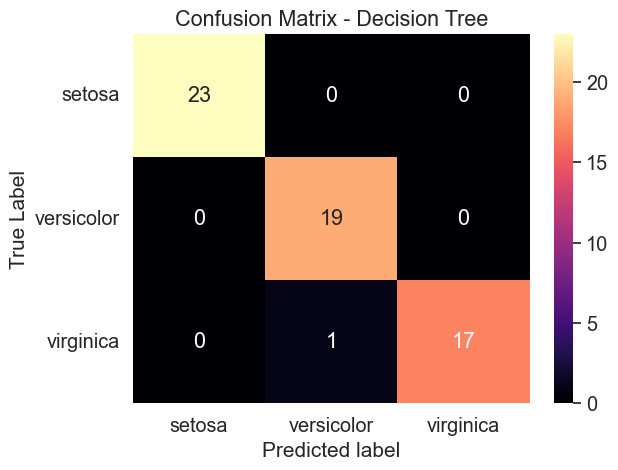

<Figure size 1000x700 with 0 Axes>

In [45]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

In the output above, only one value from the Iris-versicolor class has failed from being predicted from the unseen data. This indicates that this algorithm has done a good job at predicting unseen data overall.